# Лабораторная работа: Интерполяция рациональными функциями Беррута




## Необходимо реалиозовать метод Беррута

In [ ]:
import numpy as np

def Berrut_rational_function(x_value, y_value):
    x_value = np.asarray(x_value, dtype=float)
    y_value = np.asarray(y_value, dtype=float)
    n = len(x_value)

    # веса Беррута (-1)^k
    weights = np.array([(-1)**k for k in range(n)], dtype=float)

    def rational_function(x):
        x = np.asarray(x, dtype=float)

        # результат того же размера, что и x
        result = np.empty_like(x, dtype=float)

        # обходим все точки x (поддержка скаляров и массивов)
        for idx, xv in np.ndenumerate(x):
            diff = xv - x_value

            # если xv совпадает с узлом интерполяции - вернуть точное значение
            zero_idx = np.where(diff == 0)[0]
            if zero_idx.size > 0:
                result[idx] = y_value[zero_idx[0]]
            else:
                num = np.sum(weights * y_value / diff)
                den = np.sum(weights / diff)
                result[idx] = num / den

        return result

    return rational_function

x_values = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], dtype=float)
y_values = np.array([0.0385, 0.0588, 0.1000, 0.2000, 0.5000,
                     1.0000, 0.5000, 0.2000, 0.1000, 0.0588, 0.0385], dtype=float)

interpolation_function = Berrut_rational_function(x_values, y_values)

for x in x_values:
    print(f"x = {x: .4f}\t y = {interpolation_function(x): .4f}")


x = -5.0000	 y =  0.0385
x = -4.0000	 y =  0.0588
x = -3.0000	 y =  0.1000
x = -2.0000	 y =  0.2000
x = -1.0000	 y =  0.5000
x =  0.0000	 y =  1.0000
x =  1.0000	 y =  0.5000
x =  2.0000	 y =  0.2000
x =  3.0000	 y =  0.1000
x =  4.0000	 y =  0.0588
x =  5.0000	 y =  0.0385


## 1: Феномен Рунге
Провести сравнительный анализ интерполяции функции Рунге методами Беррута и полинома Лагранжа. Построить графики интерполяционных приближений и исходной функции, сравнить поведение методов, а также сделать выводы о качестве аппроксимации.

Необходимо:

1. Построить интерполяционные полиномы Лагранжа и Беррута для функции Рунге на выбранных узлах.

2. Визуализировать оригинальную функцию и интерполяционные результаты обоих методов.


3. Сделать выводы о преимуществах и недостатках каждого метода на данной задаче.

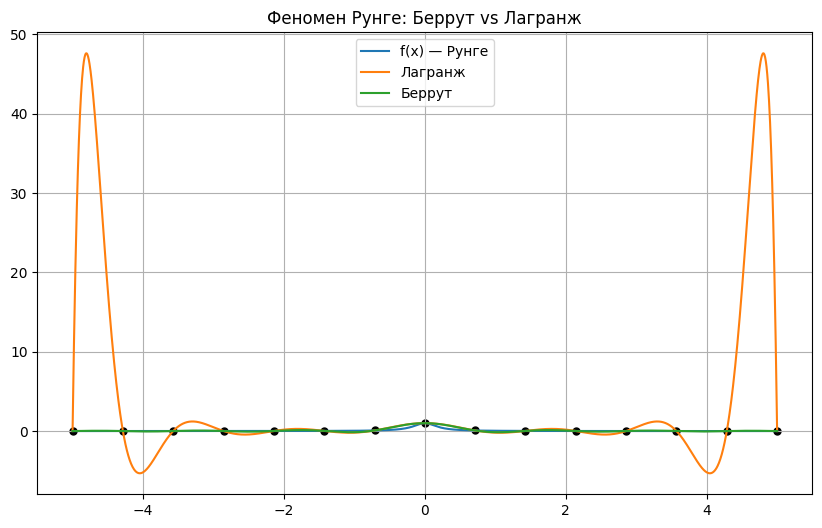

In [15]:
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator

def runge(x):
    return 1/(1 + 25*x*x)

# Узлы
n = 15
x_nodes = np.linspace(-5, 5, n)
y_nodes = runge(x_nodes)

# Интерполяции
lagrange_interp = BarycentricInterpolator(x_nodes, y_nodes)
berrut_interp = Berrut_rational_function(x_nodes, y_nodes)

# Сетка
xx = np.linspace(-5, 5, 2000)
f_true = runge(xx)
f_lagr = lagrange_interp(xx)
f_berr = berrut_interp(xx)

# График
plt.figure(figsize=(10,6))
plt.plot(xx, f_true, label="f(x) — Рунге")
plt.plot(xx, f_lagr, label="Лагранж")
plt.plot(xx, f_berr, label="Беррут")
plt.scatter(x_nodes, y_nodes, color="black", s=25)
plt.grid()
plt.legend()
plt.title("Феномен Рунге: Беррут vs Лагранж")
plt.show()

## 2: Анализ ошибок
Для полученных интерполяционных результатов (Беррута и Лагранжа) на функции Рунге вычислить следующие показатели точности:

1. Средняя абсолютная ошибка (Mean Absolute Error, MAE)

2. Максимальная абсолютная ошибка

3. Среднеквадратичная ошибка (Root Mean Squared Error, RMSE)

In [14]:
def mae(a,b): return np.mean(np.abs(a-b))
def rmse(a,b): return np.sqrt(np.mean((a-b)**2))
def maxerr(a,b): return np.max(np.abs(a-b))

print("Ошибки Лагранжа")
print("MAE =", mae(f_true, f_lagr))
print("RMSE =", rmse(f_true, f_lagr))
print("MAX =", maxerr(f_true, f_lagr))

print("\nОшибки Беррута")
print("MAE =", mae(f_true, f_berr))
print("RMSE =", rmse(f_true, f_berr))
print("MAX =", maxerr(f_true, f_berr))

Ошибки Лагранжа
MAE = 4.469141052203598
RMSE = 11.73327829831364
MAX = 47.60557713975725

Ошибки Беррута
MAE = 0.0848630009812508
RMSE = 0.13015506719127296
MAX = 0.4466364288148911


## 3: Тестирование интерполяционных методов на различных функциях
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на нескольких тестовых функциях. Для каждого метода построить интерполяционные полиномы, визуализировать результаты и оценить качество аппроксимации.
Рекомендуемые функции для тестирования:
### Список функций для тестирования

- **Функция 1:**  
  $$ f_1(x) = \sin(x), \quad x \in [-\pi, \pi] $$

- **Функция 2:**  
  $$ f_2(x) = e^x, \quad x \in [-2, 2] $$

- **Функция 3:**  
  $$ f_3(x) = x^2 \sin(x), \quad x \in [-5, 5] $$

- **Функция 4:**  
  $$ f_4(x) = |x|, \quad x \in [-3, 3] $$

- **Функция 5:**  
  $$ f_5(x) = \sin(10x) e^{-x^2}, \quad x \in [-3, 3] $$


Необходимо выполнить
1. Провести интерполяцию для каждой функции на равномерной и неравномерной сетке узлов.

2. Построить графики исходных функций и интерполяционных полиномов для обоих методов.

3. Сравнить визуально и численно (по погрешности) результаты для методов Лагранжа и Беррута.




Функция: sin(x)


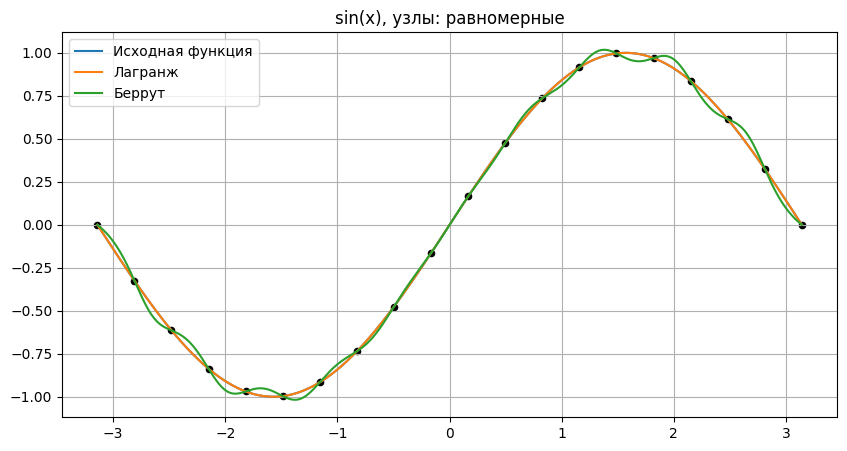

Узлы: равномерные
MAE Лагранж = 2.503731542837645e-14
MAE Беррут = 0.02392492968516044


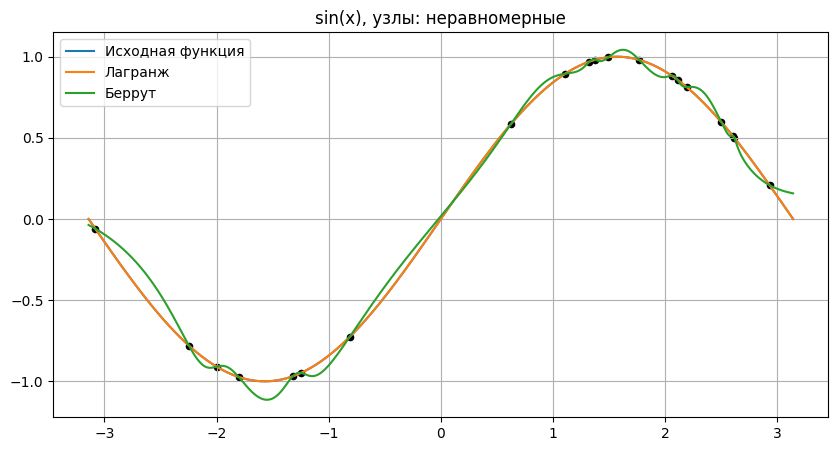

Узлы: неравномерные
MAE Лагранж = 4.114835252510392e-09
MAE Беррут = 0.04373346386408538

Функция: exp(x)


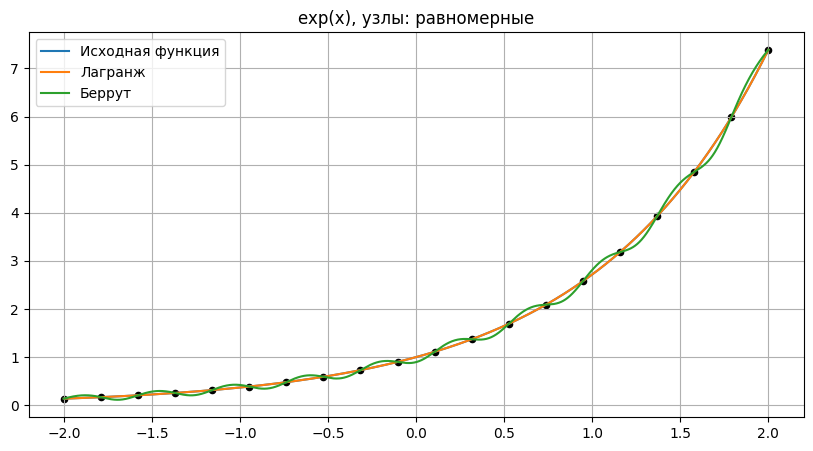

Узлы: равномерные
MAE Лагранж = 1.404535099336357e-13
MAE Беррут = 0.06969387876094156


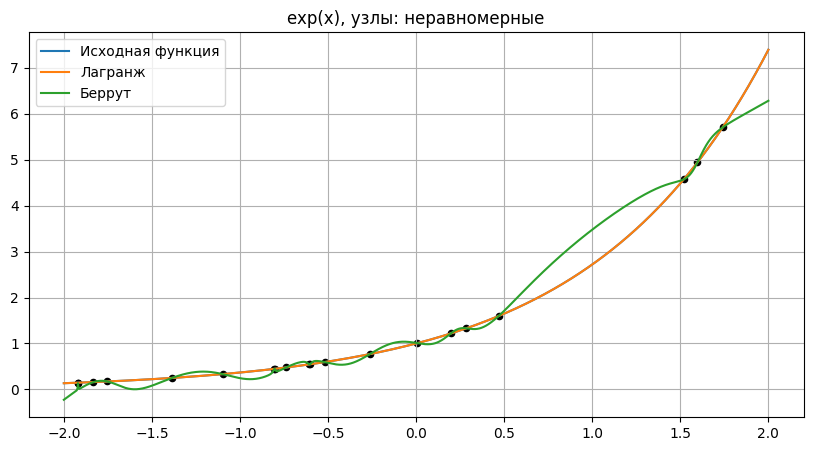

Узлы: неравномерные
MAE Лагранж = 5.692516318060364e-06
MAE Беррут = 0.221921904137896

Функция: x^2 sin(x)


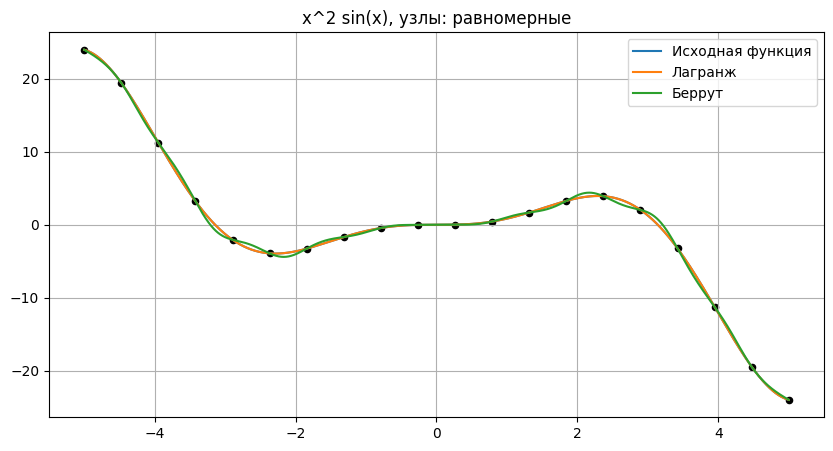

Узлы: равномерные
MAE Лагранж = 5.638587477656496e-08
MAE Беррут = 0.24062742040852111


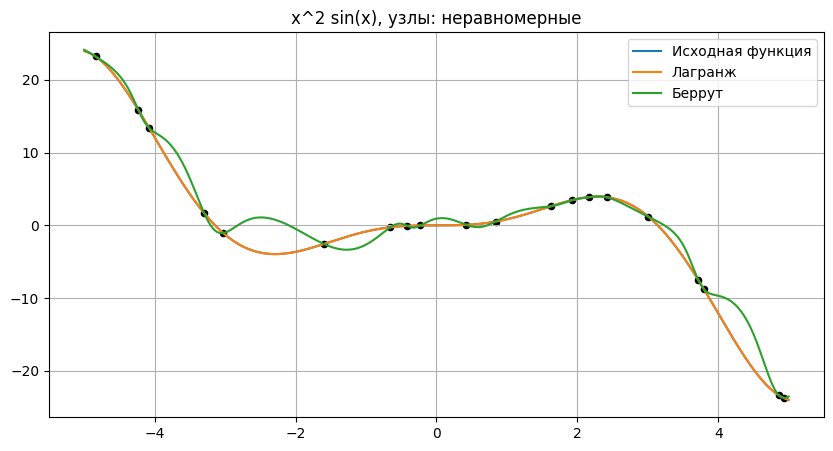

Узлы: неравномерные
MAE Лагранж = 1.0162995088841116e-07
MAE Беррут = 1.2601967119110336

Функция: |x|


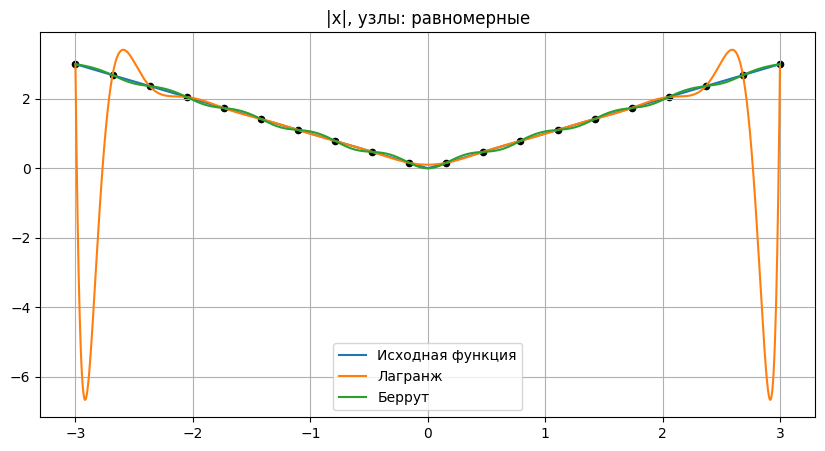

Узлы: равномерные
MAE Лагранж = 0.6146315694079458
MAE Беррут = 0.040822600368632424


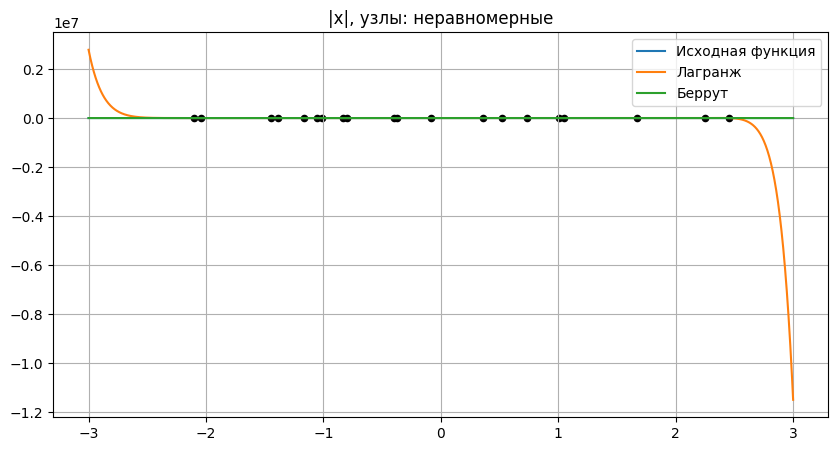

Узлы: неравномерные
MAE Лагранж = 249450.33217461553
MAE Беррут = 0.17987836444204833

Функция: sin(10x)*exp(-x^2)


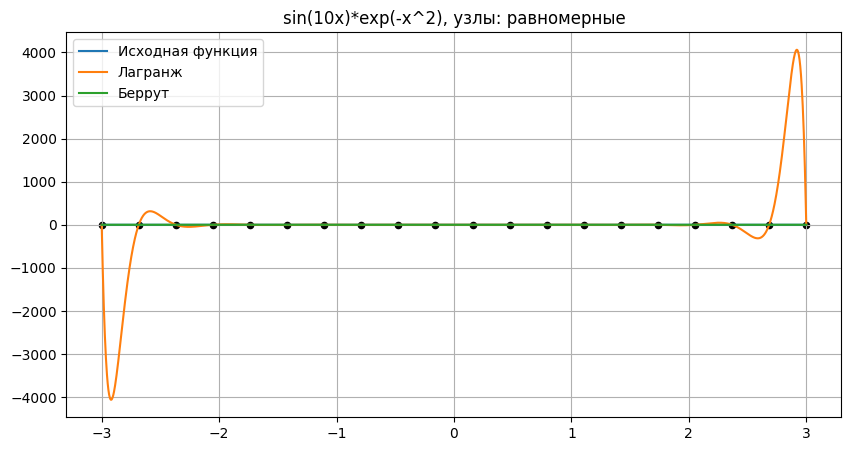

Узлы: равномерные
MAE Лагранж = 252.2272208790531
MAE Беррут = 0.24908816253352756


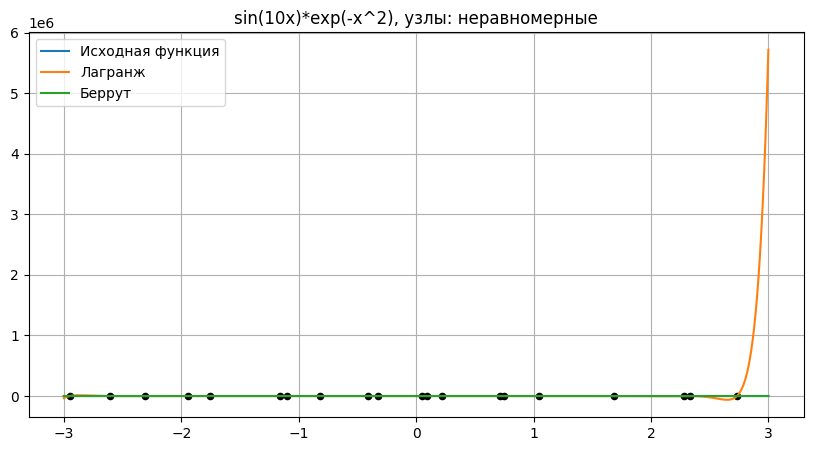

Узлы: неравномерные
MAE Лагранж = 72570.8993831861
MAE Беррут = 0.21106013830391493


In [16]:
functions = [
    (lambda x: np.sin(x), -np.pi, np.pi, "sin(x)"),
    (lambda x: np.exp(x), -2, 2, "exp(x)"),
    (lambda x: x**2 * np.sin(x), -5, 5, "x^2 sin(x)"),
    (lambda x: np.abs(x), -3, 3, "|x|"),
    (lambda x: np.sin(10*x)*np.exp(-x*x), -3, 3, "sin(10x)*exp(-x^2)")
]

for f, a, b, name in functions:
    print("\n==============================")
    print("Функция:", name)
    print("==============================")

    n = 20
    uniform_nodes = np.linspace(a, b, n)
    nonuniform_nodes = np.sort(np.random.uniform(a, b, n))

    for nodes, lab in [(uniform_nodes, "равномерные"), (nonuniform_nodes, "неравномерные")]:
        y = f(nodes)
        
        lagrange_interp = BarycentricInterpolator(nodes, y)
        berrut_interp = Berrut_rational_function(nodes, y)

        xx = np.linspace(a, b, 2000)
        f_true = f(xx)
        f_lagr = lagrange_interp(xx)
        f_berr = berrut_interp(xx)

        # График
        plt.figure(figsize=(10,5))
        plt.plot(xx, f_true, label="Исходная функция")
        plt.plot(xx, f_lagr, label="Лагранж")
        plt.plot(xx, f_berr, label="Беррут")
        plt.scatter(nodes, y, s=20, color="black")
        plt.legend()
        plt.title(f"{name}, узлы: {lab}")
        plt.grid()
        plt.show()

        print(f"Узлы: {lab}")
        print("MAE Лагранж =", mae(f_true, f_lagr))
        print("MAE Беррут =", mae(f_true, f_berr))


## 4: Интерполяция зашумленных данных
Провести сравнительный анализ методов интерполяции Лагранжа и Беррута на зашумленных данных. Необходимо построить графики, включающие:

1. График интерполяции, на котором изображены оригинальная функция, зашумленные точки и результаты интерполяции двумя методами.

2. График сравнения ошибок интерполяции каждого метода.

Варианты:
* Вариант 1: равномерные узлы, низкий гауссов шум

* Вариант 2: равномерные узлы, высокий гауссов шум



Ваш вариант: номер по списку % 2

In [ ]:

# исходная функция и генерация шума
def f(x):
    return np.sin(2*x)

def generate_data(nodes, noise_level):
    y_true = f(nodes)
    noise = np.random.normal(0, noise_level, size=nodes.shape)
    y_noisy = y_true + noise
    return y_true, y_noisy

ВАРИАНТ 1: равномерные узлы, низкий гауссов шум

Ошибки Лагранжа:
MAE  = 0.3724297476667701
RMSE = 0.5206290604641113
MAX  = 1.328781375030065

Ошибки Беррута:
MAE  = 0.26231660842877863
RMSE = 0.42160934232077496
MAX  = 1.3006409442368225


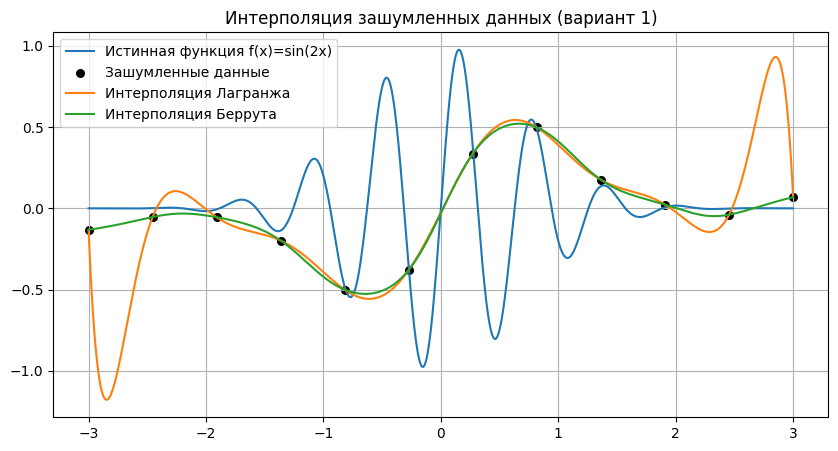

In [ ]:
n_nodes = 12
uniform_nodes = np.linspace(-3, 3, n_nodes)
noise_level = 0.05    # низкий гауссов шум

y_true_nodes, y_noisy_nodes = generate_data(uniform_nodes, noise_level)

# интерполяторы (по зашумлённым данным)
lagrange_interp = BarycentricInterpolator(uniform_nodes, y_noisy_nodes)
berrut_interp = Berrut_rational_function(uniform_nodes, y_noisy_nodes)

# оценка на плотной сетке
xx = np.linspace(-3, 3, 1500)
f_true = f(xx)
f_lagr = lagrange_interp(xx)
f_berr = berrut_interp(xx)

# метрики ошибок
def mae(a, b): return np.mean(np.abs(a - b))
def rmse(a, b): return np.sqrt(np.mean((a - b)**2))
def maxerr(a, b): return np.max(np.abs(a - b))

print("ВАРИАНТ 1: равномерные узлы, низкий гауссов шум\n")

print("Ошибки Лагранжа:")
print("MAE  =", mae(f_true, f_lagr))
print("RMSE =", rmse(f_true, f_lagr))
print("MAX  =", maxerr(f_true, f_lagr))

print("\nОшибки Беррута:")
print("MAE  =", mae(f_true, f_berr))
print("RMSE =", rmse(f_true, f_berr))
print("MAX  =", maxerr(f_true, f_berr))

# график
plt.figure(figsize=(10,5))
plt.plot(xx, f_true, label="Истинная функция f(x)=sin(2x)")
plt.scatter(uniform_nodes, y_noisy_nodes, color="black", s=30, label="Зашумленные данные")
plt.plot(xx, f_lagr, label="Интерполяция Лагранжа")
plt.plot(xx, f_berr, label="Интерполяция Беррута")
plt.grid()
plt.legend()
plt.title("Интерполяция зашумленных данных (вариант 1)")
plt.show()